## Q

Import `numpy`, `pandas`, the `pyplot` module from `matplotlib`, `seaborn`, and the `stats` module from `scipy`.

## A

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

# First contact with the *happiness* dataset

More practice with pandas and seaborn.

## Q

Load the `happiness_long.csv` data file, located in the `../data` directory of the course repository, print the first 5 rows and a summary table.

## A

In [2]:
df = pd.read_csv('../data/happiness_long.csv')

In [3]:
df.head(6)

,country,region,year,happiness,gdp,health,generosity,social,corruption
0,Afghanistan,Southern Asia,2015,3.575,0.31982,0.30335,0.36510,0.30285,0.09719
1,Albania,Central and Eastern Europe,2015,4.959,0.87867,0.81325,0.14272,0.80434,0.06413
2,Algeria,Middle East and Northern Africa,2015,5.605,0.93929,0.61766,0.07822,1.07772,0.17383
3,Argentina,Latin America and Caribbean,2015,6.574,1.05351,0.78723,0.11451,1.24823,0.08484
4,Armenia,Central and Eastern Europe,2015,4.350,0.76821,0.72990,0.07855,0.77711,0.03900
5,Australia,Australia and New Zealand,2015,7.284,1.33358,0.93156,0.43562,1.30923,0.35637


In [4]:
df.describe()

,year,happiness,gdp,health,generosity,social,corruption
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2017.000000,5.433007,0.939021,0.634448,0.218768,0.929049,0.123459
std,1.415197,1.117052,0.393786,0.236113,0.124482,0.399115,0.106336
min,2015.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.547250,0.653763,0.498102,0.128474,0.571654,0.052862
50%,2017.000000,5.427000,1.004000,0.667857,0.201725,0.987405,0.088507
75%,2018.000000,6.242500,1.250385,0.814630,0.282035,1.255679,0.153645
max,2019.000000,7.769000,1.870766,1.141000,0.838075,1.644000,0.551910


## Q

Spot the quantitative variables. Get a list of these variable names, including *year*, preferably in a non-explicit fashion.

## A

In [5]:
quantitative_variables = df.describe().columns.tolist()
quantitative_variables

['year', 'happiness', 'gdp', 'health', 'generosity', 'social', 'corruption']

## Q

Plot the quantitative variables *vs* each other, except *year*.

## A

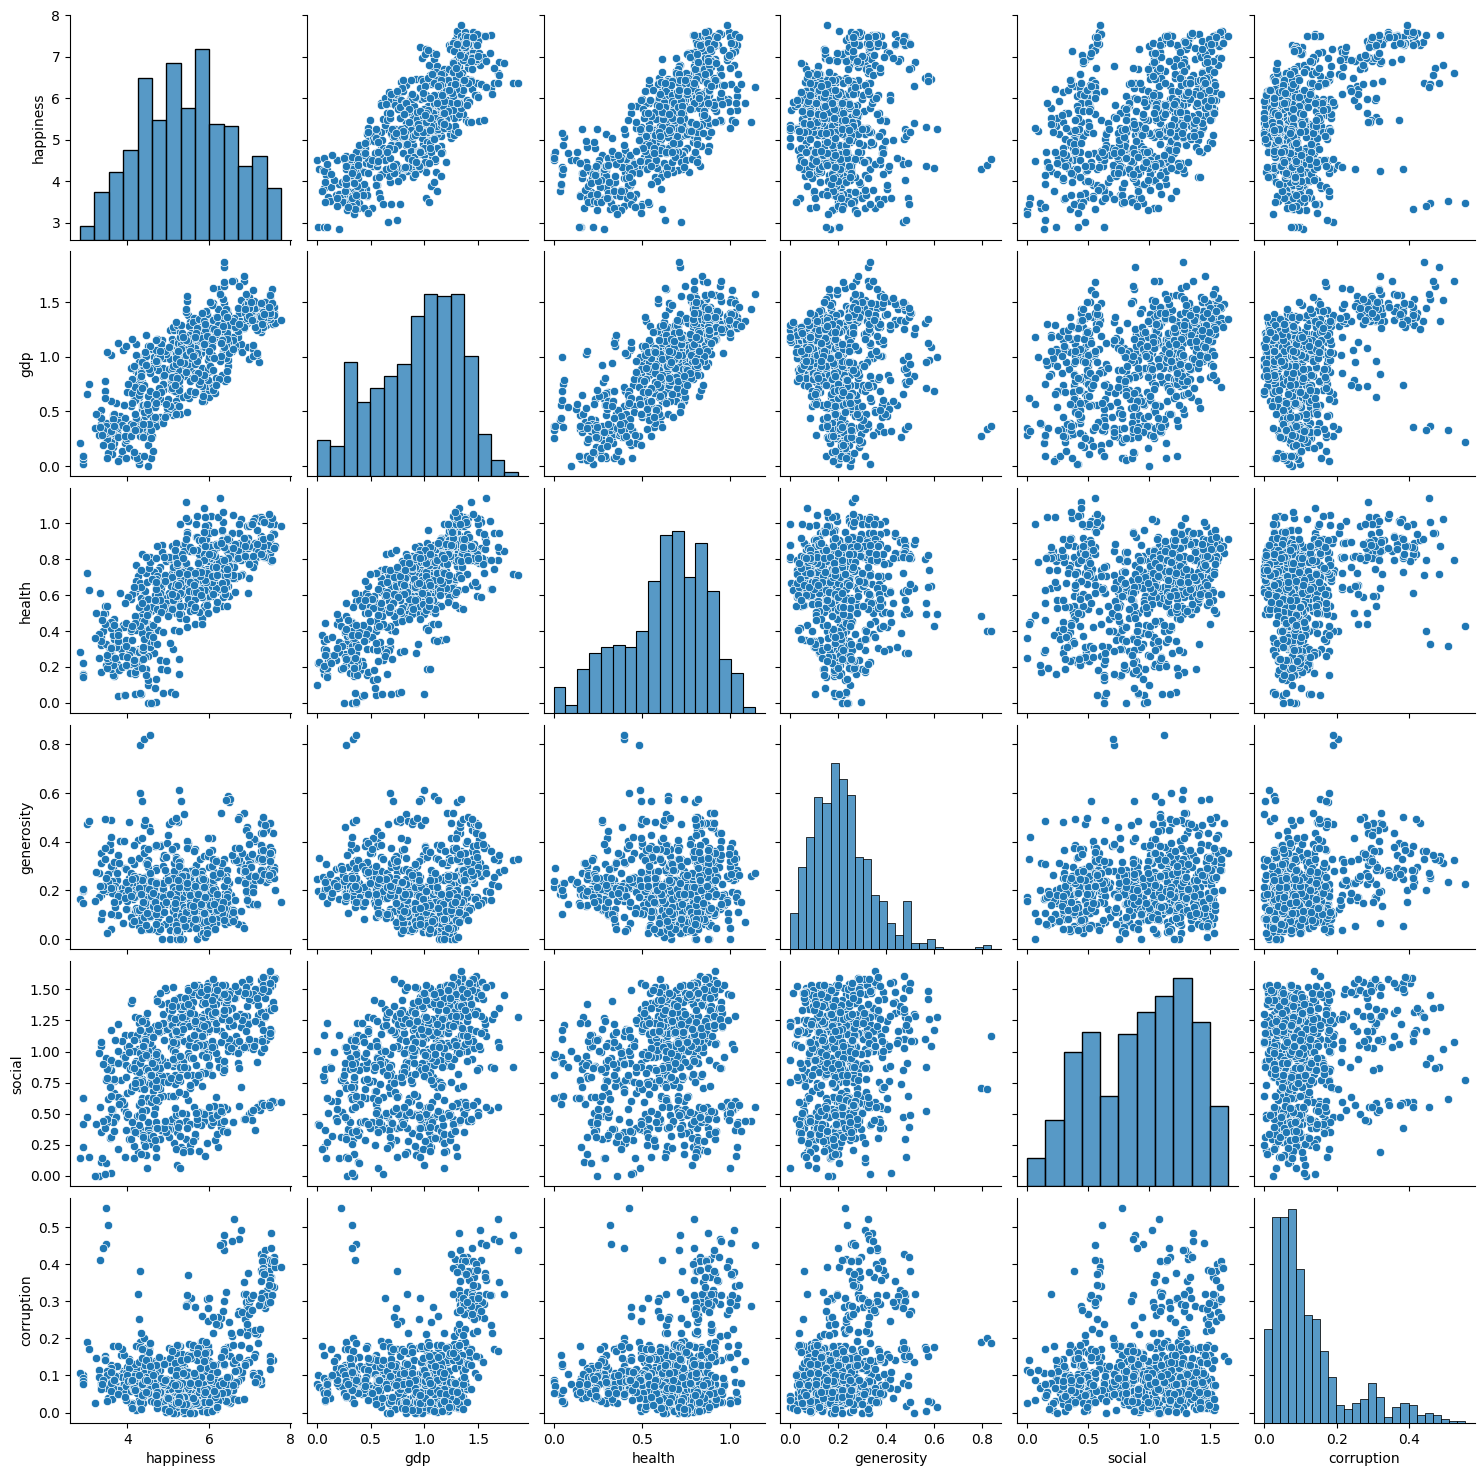

In [6]:
sns.pairplot(df[[col for col in quantitative_variables if col != 'year']]);

## Q

Inspect the relationship between variables `happiness` and `region`. What type of plots is most suitable?

Hint: to rotate the $x$ labels by 45°, get the object returned by the plotting function (let us call it `ax`) and execute:
```python
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
```

Bonus question: how would you overlay the data points on such a plot?

## A

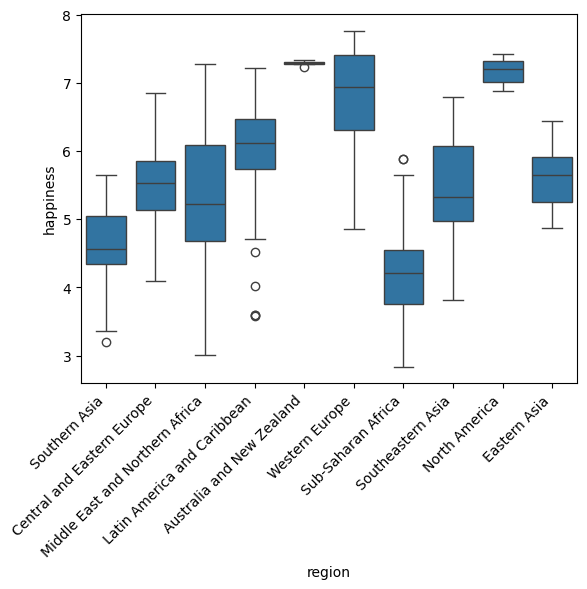

In [7]:
# categorical vs continuous => boxplot, violinplot
ax = sns.boxplot(x='region', y='happiness', data=df)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right');

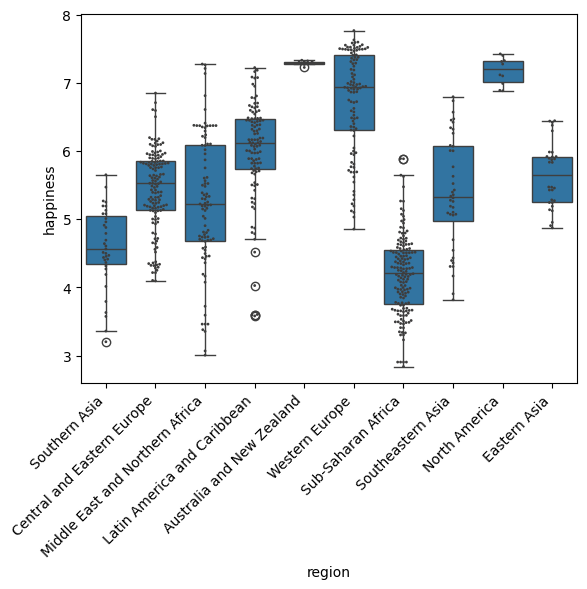

In [8]:
ax = sns.boxplot(x='region', y='happiness', data=df)
sns.swarmplot(x='region', y='happiness', hue='region', data=df, linewidth=1, size=1, legend=False)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right');

## Q

Draw a boxplot or violinplot of `happiness` for the two regions with *Europe* in their name AND `year`, both as categorical variable, in a single plot.

## A

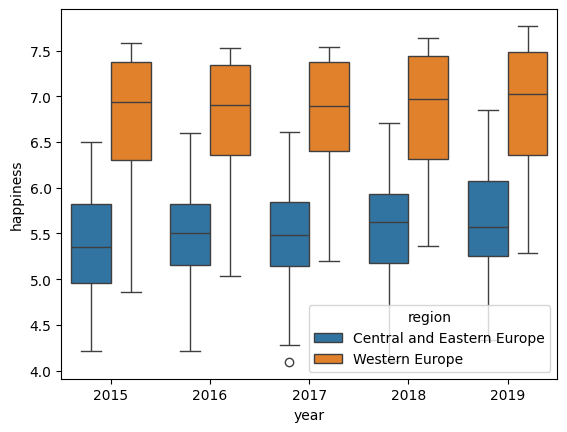

In [9]:
df_Europe = df[['Europe' in region for region in df['region']]]
# or
df_Europe = df[df.region.str.contains('Europe')]
sns.boxplot(y='happiness', x='year', data=df_Europe, hue='region');

# Comparing mean between two groups

## Q

Isolate the Sub-Saharan African countries and compute their mean happiness with its $99\%$ confidence interval.

Report the confidence interval as *mean* ± Δ_*mean*.

## A

In [10]:
happiness_Sub_Saharan_Africa = df.query('region=="Sub-Saharan Africa"')['happiness']
mean = happiness_Sub_Saharan_Africa.mean()
mean

np.float64(4.190935482701948)

In [11]:
sem = stats.sem(happiness_Sub_Saharan_Africa)
distribution_of_the_mean = stats.norm(mean, sem)
distribution_of_the_mean.interval(.99)

(np.float64(4.06944056276217), np.float64(4.312430402641726))

In [12]:
upper_bound = distribution_of_the_mean.interval(.99)[1]
delta_mean = upper_bound - mean
print(f'The mean happiness in Sub-Saharan African countries is {mean:.2f} ± {delta_mean:.2} (99% confidence)')

The mean happiness in Sub-Saharan African countries is 4.19 ± 0.12 (99% confidence)


## Q

Check whether *happiness* is normally distributed in this group of African countries, first following a graphical approach.

## A

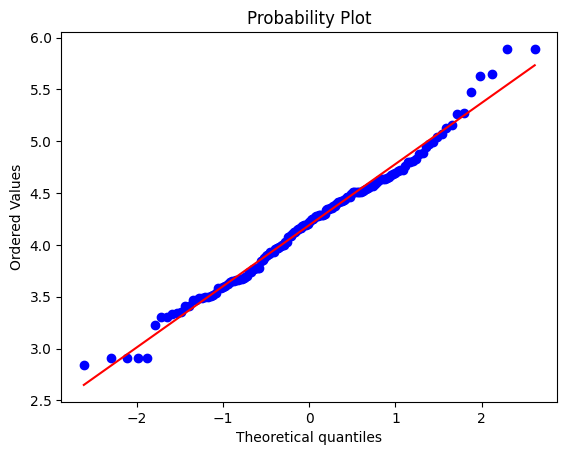

In [13]:
stats.probplot(happiness_Sub_Saharan_Africa, fit=True, plot=plt);

Bonus:

`probplot` does not allow customizing the plot, but conveniently provides the elements to reproduce the plot with lower-level functions.

In [14]:
help(stats.probplot)

Help on function probplot in module scipy.stats._morestats:

probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)
    Calculate quantiles for a probability plot, and optionally show the plot.

    Generates a probability plot of sample data against the quantiles of a
    specified theoretical distribution (the normal distribution by default).
    `probplot` optionally calculates a best-fit line for the data and plots the
    results using Matplotlib or a given plot function.

    Parameters
    ----------
    x : array_like
        Sample/response data from which `probplot` creates the plot.
    sparams : tuple, optional
        Distribution-specific shape parameters (shape parameters plus location
        and scale).
    dist : str or stats.distributions instance, optional
        Distribution or distribution function name. The default is 'norm' for a
        normal probability plot.  Objects that look enough like a
        stats.distributions instance (i.e. they ha

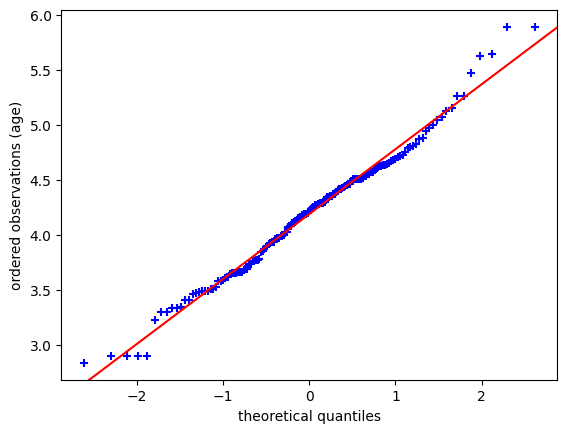

In [15]:
(theoretical_quantiles, observed_quantiles), (slope, intercept, _) = stats.probplot(happiness_Sub_Saharan_Africa, fit=True)
# blue crosses
plt.scatter(theoretical_quantiles, observed_quantiles, marker='+', color='b')
# red line
plt.axline((0, intercept), slope=slope, color='r')
# axis labels
plt.xlabel('theoretical quantiles')
plt.ylabel('ordered observations (age)');

## Q

Seek confirmation with a normality test.

In [16]:
stats.normaltest(happiness_Sub_Saharan_Africa)

NormaltestResult(statistic=np.float64(2.001226058835417), pvalue=np.float64(0.3676539893631898))

## Q

Isolate the *Middle East and Northern Africa* region. Let us compare between this group and the previous one (*Sub-Saharan Africa*).

Are the sample size and variance of the two groups similar enough for running a standard $t$ test?

## A

In [17]:
happiness_Middle_East_and_Northern_Africa = df.query('region=="Middle East and Northern Africa"')['happiness']

len(happiness_Sub_Saharan_Africa), len(happiness_Middle_East_and_Northern_Africa), np.std(happiness_Sub_Saharan_Africa), np.std(happiness_Middle_East_and_Northern_Africa)

(155, 90, np.float64(0.5853308307429951), np.float64(0.9785658886469079))

`ttest_ind` allows standard deviation ratios [up to $2$](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_similar_variances_(1/2_%3C_sX1/sX2_%3C_2)).
The groups can have different sample sizes.

## Q

Test whether the mean happiness equals between groups.

## A

In [18]:
# is the second group also normally distributed?
stats.normaltest(happiness_Middle_East_and_Northern_Africa)

NormaltestResult(statistic=np.float64(0.5038835103707232), pvalue=np.float64(0.7772900098630545))

In [19]:
# define your significance level first!
significance_level = 0.05

# run a t-test for independent samples
stats.ttest_ind(happiness_Sub_Saharan_Africa, happiness_Middle_East_and_Northern_Africa)

TtestResult(statistic=np.float64(-10.477609381949804), pvalue=np.float64(1.9396682636262036e-21), df=np.float64(243.0))

In [20]:
_, pvalue = stats.ttest_ind(happiness_Sub_Saharan_Africa, happiness_Middle_East_and_Northern_Africa)
pvalue <= significance_level

np.True_

# Nonparametric tests

Let us proceed to comparing happiness between countries in the enlarged *Europe* area and the American continent.

Plot the data and observe that the happiness data for *Europe* does not follow a normal distribution.

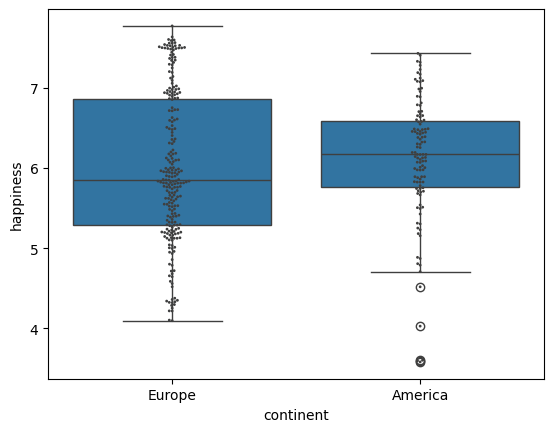

In [21]:
df_America = df[['America' in region for region in df['region']]].copy()
# note: "continent" may not be the most appropriate name here, with the European group...
df_America['continent'] = 'America'

df_Europe = df_Europe.copy()
df_Europe['continent'] = 'Europe'
df_Europe_and_America = pd.concat((df_Europe, df_America))

sns.boxplot(x='continent', y='happiness', data=df_Europe_and_America)
sns.swarmplot(x='continent', y='happiness', hue='continent', data=df_Europe_and_America, linewidth=1, size=1, legend=False);

In [22]:
stats.normaltest(df_Europe['happiness'])

NormaltestResult(statistic=np.float64(21.258221678090486), pvalue=np.float64(2.420113950213162e-05))

## Q

Check whether there is a difference in happiness (in “location”) between the two groups using an appropriate test.

## A

In [23]:
stats.mannwhitneyu(df_Europe['happiness'], df_America['happiness'])

MannwhitneyuResult(statistic=np.float64(12259.5), pvalue=np.float64(0.04714327489829247))

In [24]:
df_Europe_and_America.groupby('continent')['happiness'].median()

continent
America    6.168
Europe     5.848
Name: happiness, dtype: float64

## Q

Test whether the two distributions differ in a more general fashion (not only in location). Choose a straight-forward solution here.

## A

In [25]:
stats.ks_2samp(df_Europe['happiness'], df_America['happiness'])

KstestResult(statistic=np.float64(0.23229813664596274), pvalue=np.float64(0.0003355741501454223), statistic_location=np.float64(5.97100019454956), statistic_sign=np.int8(1))

## Q

Alternatively, we could carry out a two-sample goodness-of-fit test using a $\chi^2$ test of homogeneity. To do so, we need to bin the *happiness* values.

Bin the happiness for two groups, using common bins. Do so first with 3-4, 4-5, 5-6, 6-7 and 6-8 bins. Extract the corresponding frequencies, check we do not miss any observation, and proceed to performing a $\chi^2$ test.

### A

In [26]:
bins = np.arange(3, 9) # remember the upper bound is excluded
bins

array([3, 4, 5, 6, 7, 8])

In [27]:
happiness_freqs_Europe, _ = np.histogram(df_Europe['happiness'], bins)
happiness_freqs_America, _ = np.histogram(df_America['happiness'], bins)
happiness_freqs_Europe, happiness_freqs_America

(array([  0,  29, 115,  57,  44]), array([ 3,  7, 33, 59, 13]))

In [28]:
happiness_freqs_Europe.sum() == df_Europe.shape[0] and happiness_freqs_America.sum() == df_America.shape[0]

np.True_

Note that we have less than 5 observations in some intervals. In principle, we should revise the binning so that all bins contain at least 5 observations.

For the purpose of comparing the impact of the binning, let us run the test anyway.

In [29]:
chi2, pvalue, dof, _ = stats.chi2_contingency(np.stack((happiness_freqs_Europe, happiness_freqs_America), axis=0))
print(f'χ²({dof}) = {chi2:.1f}, p-value = {pvalue:.3g}')

χ²(4) = 36.6, p-value = 2.18e-07


### Q

Are all the assumptions met? Adjust the procedure if necessary. Any interpretation?

### A

In [30]:
bins = [0, 5, 6, 7, 10]
happiness_freqs_Europe, _ = np.histogram(df_Europe['happiness'], bins)
happiness_freqs_America, _ = np.histogram(df_America['happiness'], bins)
happiness_freqs_Europe, happiness_freqs_America

(array([ 29, 115,  57,  44]), array([10, 33, 59, 13]))

In [31]:
chi2, pvalue, dof, _ = stats.chi2_contingency(np.stack((happiness_freqs_Europe, happiness_freqs_America), axis=0))
print(f'χ²({dof}) = {chi2:.1f}, p-value = {pvalue:.3g}')

χ²(3) = 28.3, p-value = 3.09e-06
